# Kalp Hastalığı Tespit
- veri seti : https://www.kaggle.com/datasets/amirmahdiabbootalebi/heart-disease

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('data/heart.csv')

In [22]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [23]:
data.shape

(918, 12)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [26]:
# null değer kontrolu
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [27]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [28]:
# sutun isimleri değiştir
data.columns = [
    'Yas',                 
    'Cinsiyet',            
    'Gogus_Agrisi_Tipi',   
    'Dinlenme_Tansiyonu',  
    'Kolesterol',          
    'Aclik_Kan_Sekeri',    
    'EKG_Sonucu',          
    'Max_Kalp_Hizi',       
    'Egzersiz_Anjini',     
    'ST_Depresyonu',       
    'ST_Egimi',            
    'Kalp_Hastaligi'       
]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Yas                 918 non-null    int64  
 1   Cinsiyet            918 non-null    object 
 2   Gogus_Agrisi_Tipi   918 non-null    object 
 3   Dinlenme_Tansiyonu  918 non-null    int64  
 4   Kolesterol          918 non-null    int64  
 5   Aclik_Kan_Sekeri    918 non-null    int64  
 6   EKG_Sonucu          918 non-null    object 
 7   Max_Kalp_Hizi       918 non-null    int64  
 8   Egzersiz_Anjini     918 non-null    object 
 9   ST_Depresyonu       918 non-null    float64
 10  ST_Egimi            918 non-null    object 
 11  Kalp_Hastaligi      918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
# kategorik sutunlar
cat_cols = ['Cinsiyet', 'Gogus_Agrisi_Tipi', 'EKG_Sonucu', 'Egzersiz_Anjini', 'ST_Egimi']

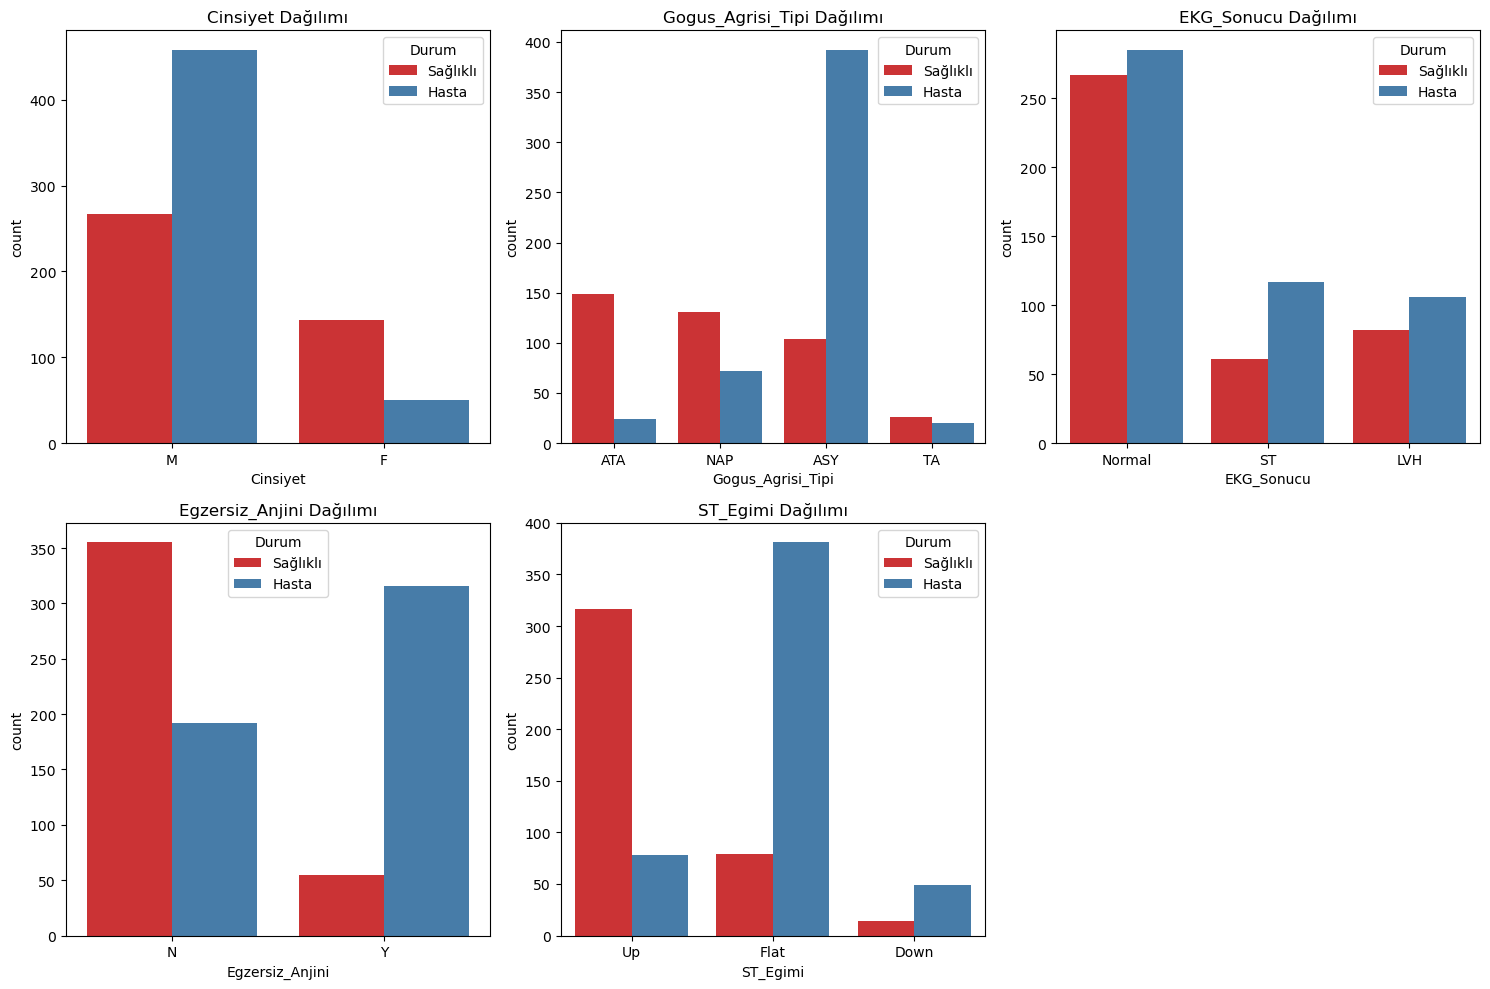

In [31]:
# kategorik incelemesi
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Kalp_Hastaligi', data=data, palette='Set1')
    plt.title(f'{col} Dağılımı')
    plt.legend(title='Durum', labels=['Sağlıklı', 'Hasta'])

plt.tight_layout()
plt.show()

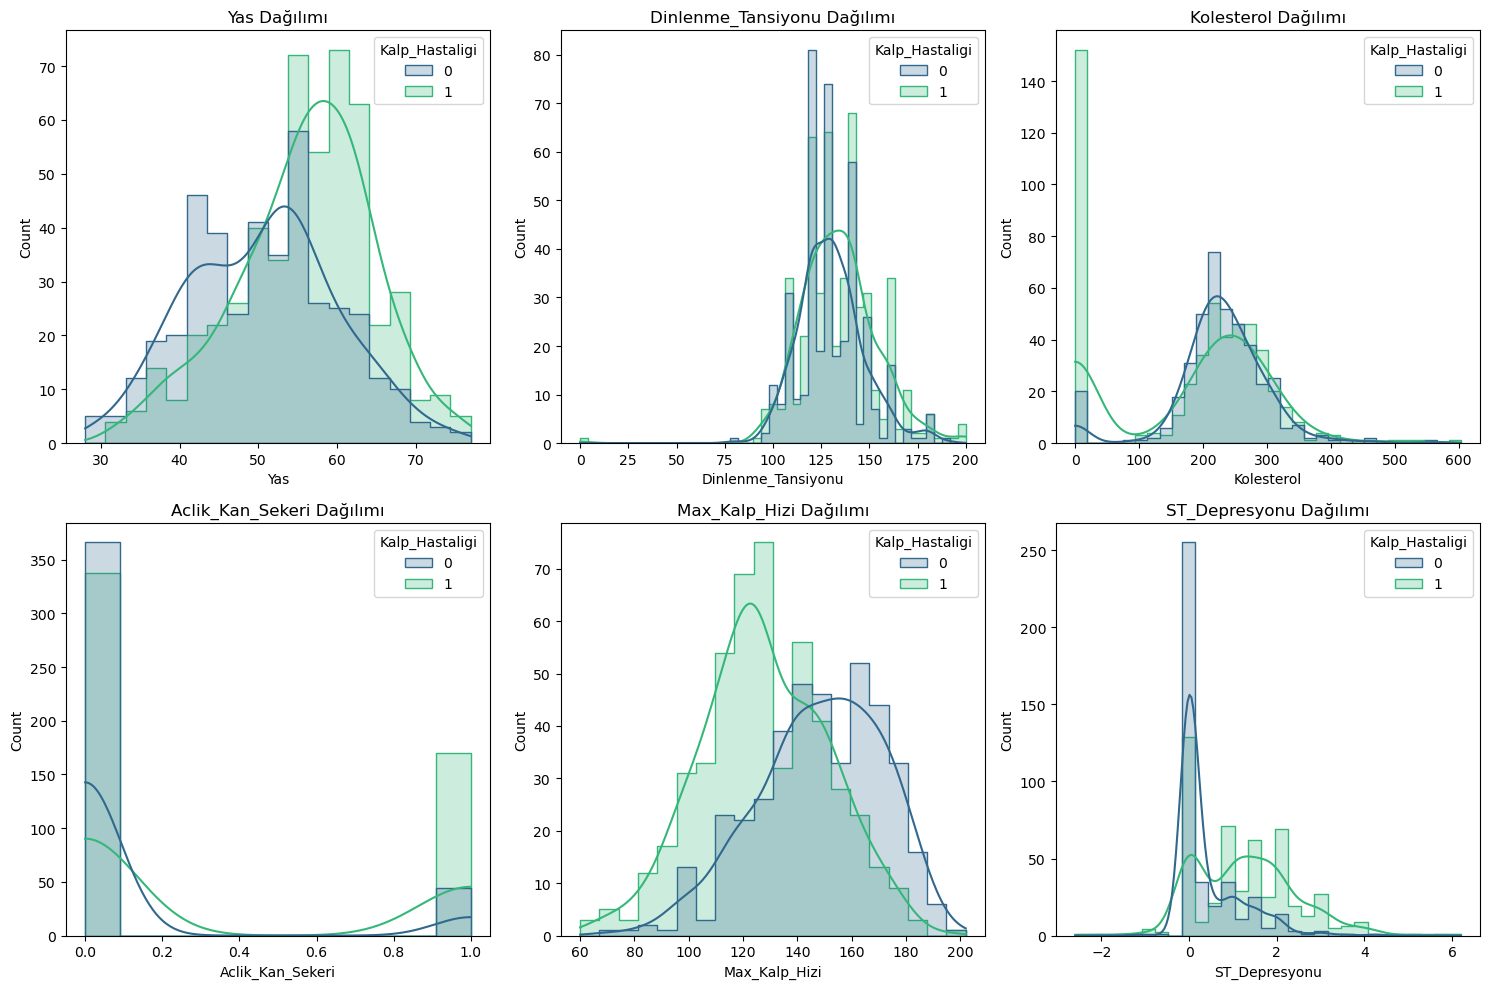

In [32]:
# sayısal sutun inceleme
num_cols = ['Yas', 'Dinlenme_Tansiyonu', 'Kolesterol','Aclik_Kan_Sekeri', 'Max_Kalp_Hizi', 'ST_Depresyonu']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, hue='Kalp_Hastaligi', kde=True, element="step", palette='viridis')
    plt.title(f'{col} Dağılımı')

plt.tight_layout()
plt.show()

In [33]:
# kolestrol 0 olması mümkün değildir bir insanda NaN değer olarak atayacağız sonra Medyan ile dolduracağız

data['Kolesterol'] = data['Kolesterol'].replace(0, np.nan)
data['Kolesterol'] = data['Kolesterol'].fillna(data.groupby('Kalp_Hastaligi')['Kolesterol'].transform('median'))

In [35]:
# kategorik sutunlar için one hot encoding yapılacak
categorical_cols = ['Cinsiyet', 'Gogus_Agrisi_Tipi', 'EKG_Sonucu', 'Egzersiz_Anjini', 'ST_Egimi']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [39]:
print(data.shape)
data_encoded.head()

(918, 12)


,Yas,Dinlenme_Tansiyonu,Kolesterol,Aclik_Kan_Sekeri,Max_Kalp_Hizi,ST_Depresyonu,Kalp_Hastaligi,Cinsiyet_M,Gogus_Agrisi_Tipi_ATA,Gogus_Agrisi_Tipi_NAP,Gogus_Agrisi_Tipi_TA,EKG_Sonucu_Normal,EKG_Sonucu_ST,Egzersiz_Anjini_Y,ST_Egimi_Flat,ST_Egimi_Up
0,40,140,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


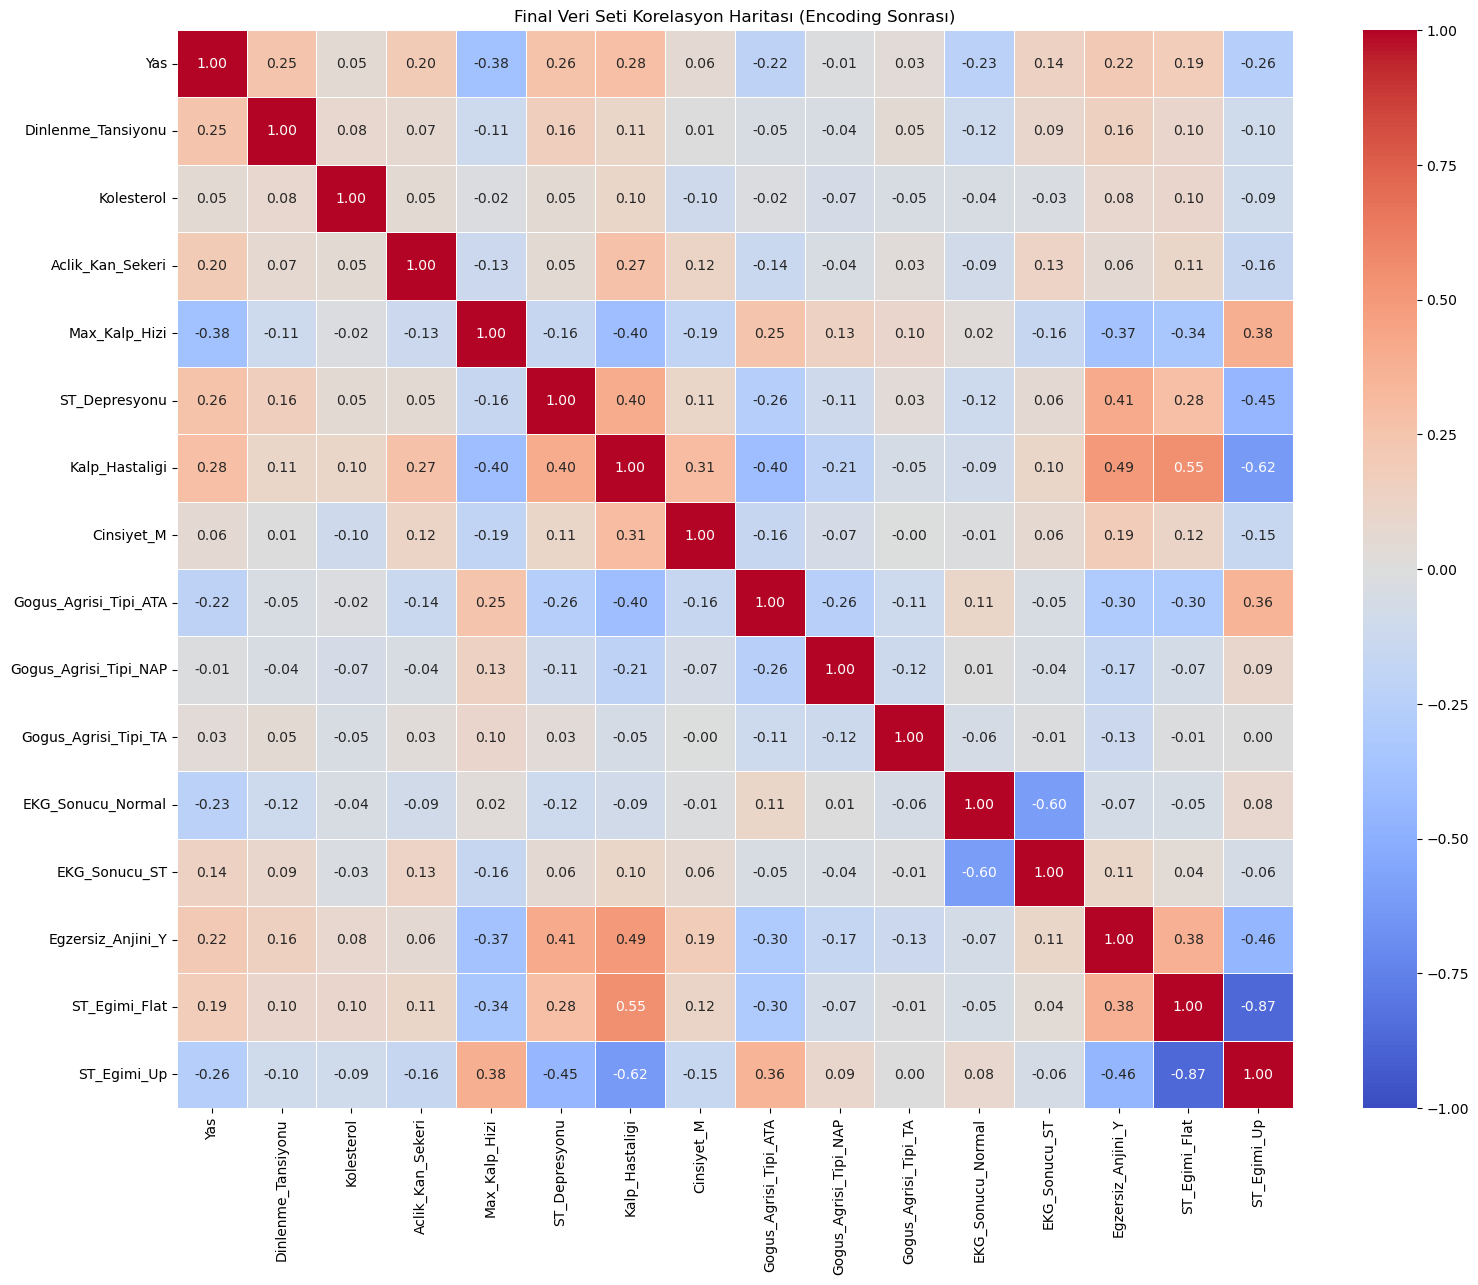

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Final Veri Seti Korelasyon Haritası (Encoding Sonrası)')
plt.show()

In [43]:
df_final = data_encoded.copy()

# Yaşlandıkça kolesterolün damar tıkanıklığı yapma ihtimali artar.
df_final['Yas_Kolesterol_Etkisi'] = df_final['Yas'] * df_final['Kolesterol']
print(df_final[['Yas', 'Yas_Kolesterol_Etkisi']].head())

   Yas  Yas_Kolesterol_Etkisi
0   40                11560.0
1   49                 8820.0
2   37                10471.0
3   48                10272.0
4   54                10530.0


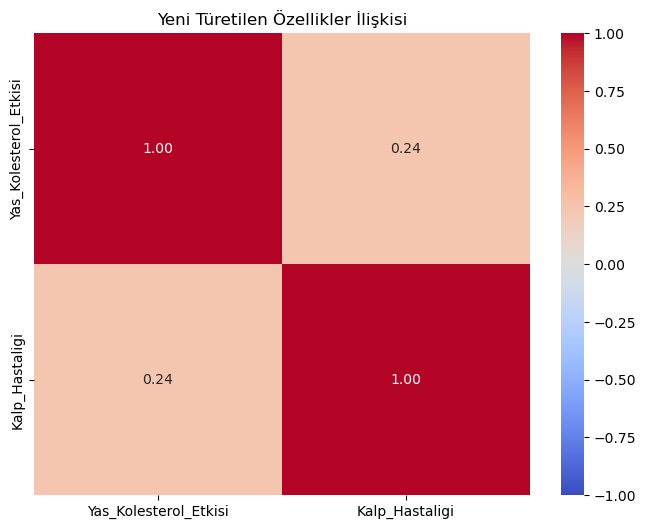

In [44]:
new_features = ['Yas_Kolesterol_Etkisi', 'Kalp_Hastaligi']

plt.figure(figsize=(8, 6))
sns.heatmap(df_final[new_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Yeni Türetilen Özellikler İlişkisi')
plt.show()

* kolestrol etkisi tek başına 0.1 iken yas kolestrol etkisi 0.24 gibi bir etkiye sahip oldu

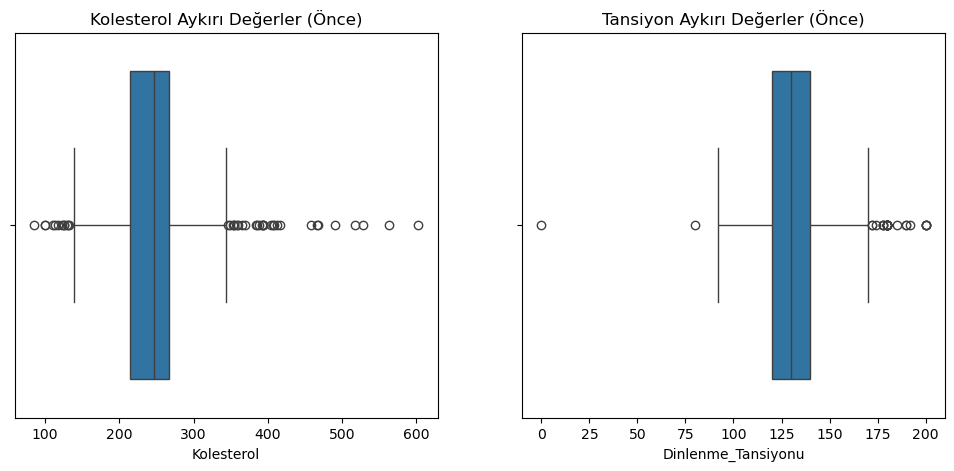

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_final['Kolesterol'])
plt.title('Kolesterol Aykırı Değerler (Önce)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['Dinlenme_Tansiyonu'])
plt.title('Tansiyon Aykırı Değerler (Önce)')

plt.show()

In [46]:
# aykırı değerleri sıkıştırarak törpülemek
def outlier_capping(df, col):
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.05)
    
    df[col] = np.where(df[col] > upper_limit, upper_limit,
              np.where(df[col] < lower_limit, lower_limit, df[col]))
    return df

df_final = outlier_capping(df_final, 'Kolesterol')
df_final = outlier_capping(df_final, 'Dinlenme_Tansiyonu')
df_final = outlier_capping(df_final, 'Max_Kalp_Hizi')

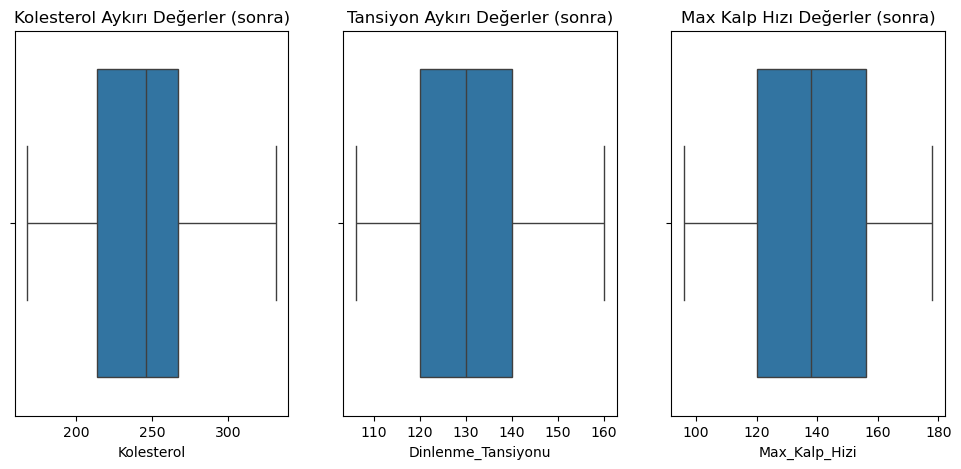

In [51]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_final['Kolesterol'])
plt.title('Kolesterol Aykırı Değerler (sonra)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_final['Dinlenme_Tansiyonu'])
plt.title('Tansiyon Aykırı Değerler (sonra)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_final['Max_Kalp_Hizi'])
plt.title('Max Kalp Hızı Değerler (sonra)')

plt.show()

## Modelleme

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
# hedef değişkeni ayır
X = df_final.drop('Kalp_Hastaligi', axis=1)  
y = df_final['Kalp_Hastaligi']              

In [54]:
# hasta/saglıklı oranı sabit kalsın stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
# standartlaştırıyoruz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# sınıflandırma algoritması / 200 karar ağacı 10 derinlik
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [58]:
# tahmin ve sonuçlar
y_pred = rf_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

In [59]:
print("="*40)
print(f"accuracy: %{acc * 100:.2f}")
print("="*40)

accuracy: %88.04


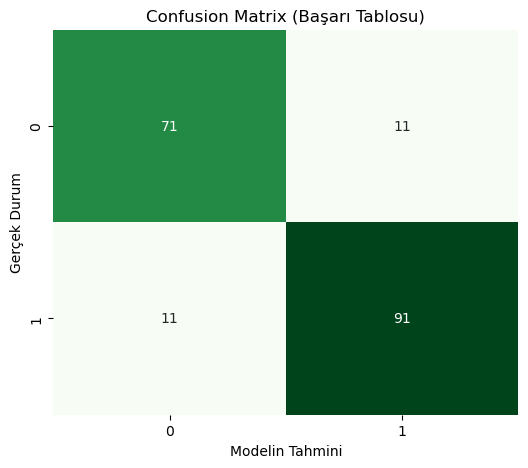

In [60]:
# hata matrisi
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Başarı Tablosu)')
plt.ylabel('Gerçek Durum')
plt.xlabel('Modelin Tahmini')
plt.show()

In [62]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\n Modelin En Çok Kullandığı 10 Özellik:")
print(feature_imp.head(10))


 Modelin En Çok Kullandığı 10 Özellik:
ST_Egimi_Up              0.178802
ST_Egimi_Flat            0.118070
ST_Depresyonu            0.113507
Max_Kalp_Hizi            0.088523
Kolesterol               0.084863
Egzersiz_Anjini_Y        0.082119
Yas_Kolesterol_Etkisi    0.071454
Yas                      0.061820
Dinlenme_Tansiyonu       0.055287
Gogus_Agrisi_Tipi_ATA    0.037394
dtype: float64


In [63]:
print("\nDetaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [65]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 4.4 MB/s eta 0:00:00:00:0100:01


In [67]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# SVM - Support Vector Machine
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)


rf_score = acc

print("karşılaştırma")
print("-" * 35)
print(f"Random Forest Doğruluk : %{rf_score * 100:.2f}")
print(f"XGBoost Doğruluk       : %{acc_xgb * 100:.2f}")
print(f"SVM Doğruluk           : %{acc_svm * 100:.2f}")
print("-" * 35)


karşılaştırma
-----------------------------------
Random Forest Doğruluk : %88.04
XGBoost Doğruluk       : %86.96
SVM Doğruluk           : %87.50
-----------------------------------


/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [12:03:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
